<a href="https://colab.research.google.com/github/AndreCauper/DataScience/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Tokio*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [65]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib as plt
import seaborn as sn
import numpy as np
%matplotlib inline

In [66]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("listings.csv")
ndf = pd.read_csv("listings.csv", index_col="minimum_nights")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* ndf = variável utilizada com indice diferente do original
* df_corr = matriz de correlação
* plot = variável para plotar gráfico heatmap

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

### ao analizar a consulta das  primeiras linhas do dataset, notamos **caracteres não latinos** que estão presentes no dataset

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [79]:
# identificar o volume de dados do DataFrame

# verificar as 5 primeiras entradas do dataset

print("volume de dados do DataSet : ", df.shape)
print("Quantidade de colunas Variáveis no DataSet :\n", df.dtypes)

volume de dados do DataSet :  (9786, 18)
Quantidade de colunas Variáveis no DataSet :
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [124]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
print("Valores ordenados : ")
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

#ordenando por dordem alfabética
#df.sort_index(ascending=True,axis=1).isnull().sum()/df.shape[0]

Valores ordenados : 


neighbourhood_group               1.000000
reviews_per_month                 0.142653
last_review                       0.142653
license                           0.002759
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

algumas variáveis são numéricas, mas não possuem significados para histograma. são elas : id, host_id, latitude, longitude 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa91c1109a0>,
      dtype=object)

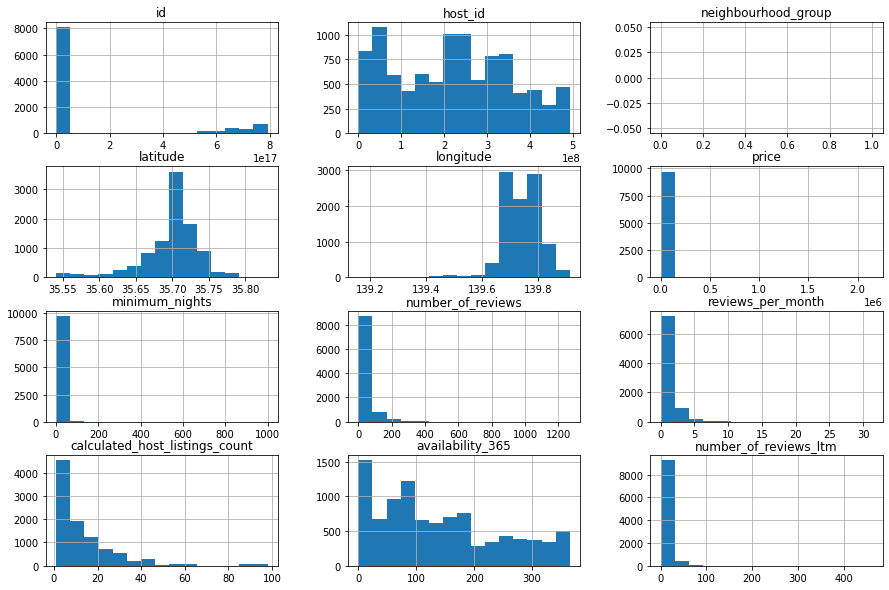

In [121]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))

### chamando as funções de histograma originalmente, o resultado nos mostra gráficos que não trasmitem algum tipo de informação

In [36]:
# verificando valores com describe

df[["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]].describe()/1000000

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,0.009786,0.009786,0.009786,8.390000e-03,0.009786,0.009786
mean,0.024393,0.000003,0.000032,1.154415e-06,0.000014,0.000139
std,0.053112,0.000013,0.000053,1.361996e-06,0.000016,0.000106
min,0.000000,0.000001,0.000000,2.000000e-08,0.000001,0.000000
25%,0.010000,0.000001,0.000002,3.700000e-07,0.000004,0.000055
50%,0.015864,0.000001,0.000011,8.200000e-07,0.000008,0.000117
75%,0.026614,0.000002,0.000040,1.470000e-06,0.000018,0.000213
max,2.146286,0.001000,0.001268,3.132000e-05,0.000098,0.000365


### Olhando o resumo estatístico acima, observamos os segeuintes detalhes
* Os números possuem possuem uma alta ordem de grandeza (10^4). Isso se dar pelo falor de o japão utilizar numerais multiplo de 1000 e 10000. por isso foi dividido por 10000
* A variável `price` possui 75% do valor abaixo de 0.026614 (lÊ-se 26614), porém seu valor máximo é 2.146286 (lê-se 2.146.286).
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.


quantidade de noites mínimas acima de 30 :  32
porcentagem :  0.0032699775189045576


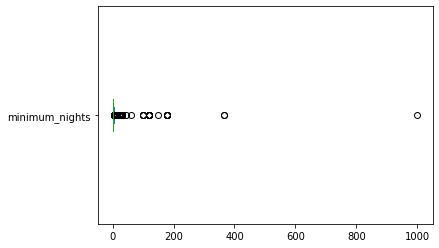

In [17]:
# plot de gráfico para noites mínimas 
df.minimum_nights.plot(kind="box",vert = False)
print("quantidade de noites mínimas acima de 30 : ", len(df[df.minimum_nights > 30]))
print("porcentagem : ", len(df[df.minimum_nights > 30])/df.shape[0])

Quantidade de preços anormais 486
porcentagem dos dados 0.04966278356836297


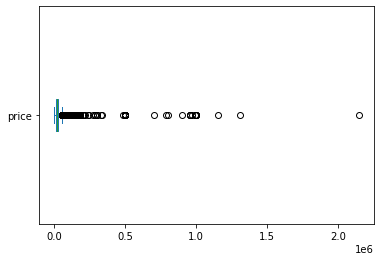

In [40]:
#plot de grafico de preço maior que 
df.price.plot(kind="box", vert = False)
print ("Quantidade de preços anormais", len(df[df.price>56614]))
print ("porcentagem dos dados",len(df[df.price > 56614])/df.shape[0])


### Plotar histogramas sem ***outliers***

Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3eeeb5a0d0>,
      dtype=object)

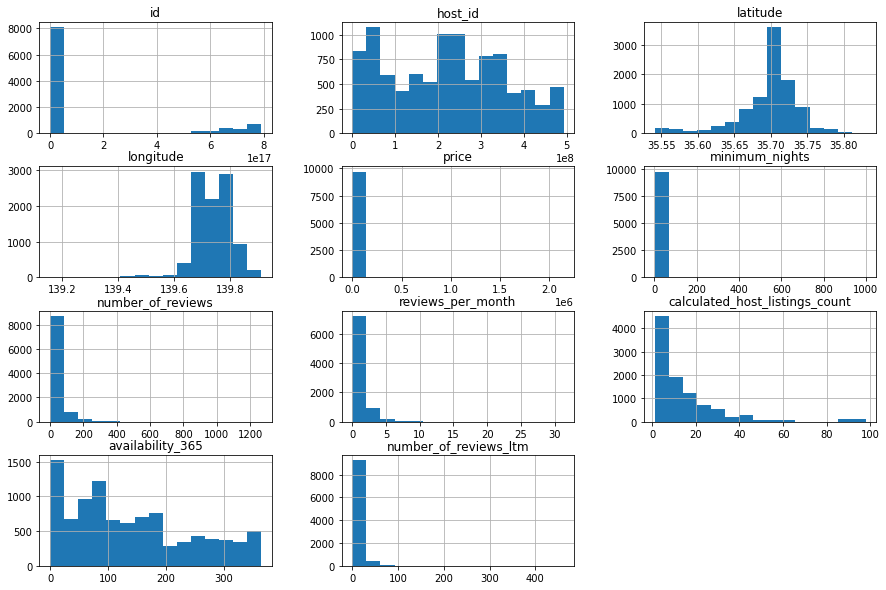

In [51]:
# remover os outliers e criar novo dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index)
df_clean.drop(df_clean[df_clean.price >56614] .index)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop("neighbourhood_group", axis =1, inplace = True)

#plot do dataframe

df_clean.hist(bins=15, figsize=(15,10))

### **Q4. Qual a média dos preços de aluguel?**

In [42]:
# ver a média da coluna `price``
df.price.mean()


24393.107398324137

### **Q4. Qual a correlação existente entre as variáveis**

In [3]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9.786000e+03,9.786000e+03,0.0,9786.000000,9786.000000,9.786000e+03,9786.000000,9786.000000,8390.000000,9786.000000,9786.000000,9786.000000
mean,1.226844e+17,2.214446e+08,NaN,35.698058,139.737664,2.439311e+04,2.627325,32.150623,1.154415,13.837932,138.605866,7.963008
std,2.674419e+17,1.352475e+08,NaN,0.039771,0.072689,5.311154e+04,13.448947,53.032852,1.361996,16.307022,106.447619,15.272917
min,1.976770e+05,3.222340e+05,NaN,35.540630,139.157320,0.000000e+00,1.000000,0.000000,0.020000,1.000000,0.000000,0.000000
25%,3.202411e+07,9.430273e+07,NaN,35.688493,139.700832,1.000000e+04,1.000000,2.000000,0.370000,4.000000,55.000000,0.000000
50%,4.205199e+07,2.281334e+08,NaN,35.703500,139.732675,1.586400e+04,1.000000,11.000000,0.820000,8.000000,117.000000,3.000000
75%,5.169673e+07,3.258108e+08,NaN,35.719083,139.789017,2.661400e+04,2.000000,40.000000,1.470000,18.000000,213.000000,9.000000
max,7.918254e+17,4.929537e+08,NaN,35.830640,139.911580,2.146286e+06,1000.000000,1268.000000,31.320000,98.000000,365.000000,462.000000


In [78]:
# criar uma matriz de correlação

# mostrar a matriz de correlação

df_corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(df_corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.137627,-0.008581,0.013875,-0.034078,0.056904
minimum_nights,0.137627,1.000000,-0.024135,-0.043569,-0.030314,0.010664
number_of_reviews,-0.008581,-0.024135,1.000000,0.645269,-0.173787,-0.056842
reviews_per_month,0.013875,-0.043569,0.645269,1.000000,-0.084844,0.029030
calculated_host_listings_count,-0.034078,-0.030314,-0.173787,-0.084844,1.000000,0.059200
availability_365,0.056904,0.010664,-0.056842,0.029030,0.059200,1.000000


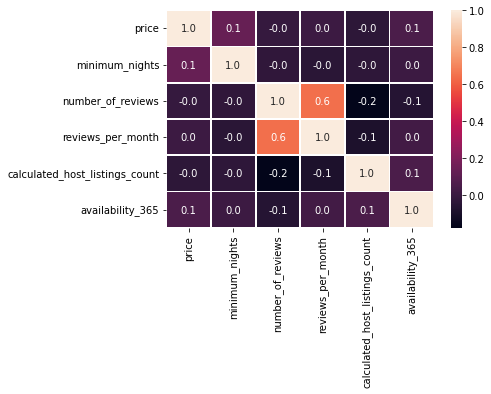

In [79]:
# plotar um heatmap a partir das correlações
plot = sn.heatmap(df_corr, annot = True, fmt=".1f", linewidths=.8)



### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [108]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()


Entire home/apt    6852
Private room       2368
Hotel room          315
Shared room         251
Name: room_type, dtype: int64

In [109]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts()/df.shape[0]


Entire home/apt    0.700184
Private room       0.241978
Hotel room         0.032189
Shared room        0.025649
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [126]:
# ver preços por bairros, na média
df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False)


neighbourhood
Okutama Machi          166000.000000
Komae Shi              134444.714286
Edogawa Ku              42146.256545
Kodaira Shi             37105.750000
Shinagawa Ku            34700.034483
Chiyoda Ku              31782.208092
Musashino Shi           31633.166667
Katsushika Ku           31077.458678
Arakawa Ku              28235.995000
Nakano Ku               27436.357143
Shinjuku Ku             27410.371098
Minato Ku               27085.843666
Itabashi Ku             25908.141844
Toshima Ku              25363.011688
Chuo Ku                 24161.172285
Shibuya Ku              24099.793738
Mitaka Shi              23386.222222
Sumida Ku               22994.853705
Taito Ku                22974.279846
Ota Ku                  19284.554217
Adachi Ku               17903.042553
Meguro Ku               17628.288462
Bunkyo Ku               17325.575000
Suginami Ku             17230.425234
Koto Ku                 17201.693548
Hamura Shi              17165.500000
Setagaya Ku             

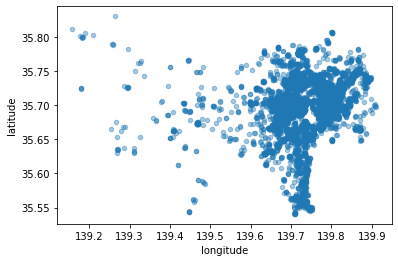

In [68]:
# plotar os imóveis pela latitude-longitude
df_clean.plot.scatter( x='longitude', y='latitude', alpha = 0.4)


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights`
df.minimum_nights.mean()

## Conclusões


foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

apesar de tokio ser uma das maiores cidades do planeta, o número de registros disponíveis no arquivo é relativamente pequeno se comparado com cidade menores, mas que possuem maior atração turística

ao analisar os dados, podemos ver caracteres japoneses que, caso seja feita outro tipo de análise pois será dificil comparar escrita latina com japonesa

os números são tratados com multiplos de mil, o que dificulta um pouco o entendimento de variaveis numéricas e que as vezes podem nos induzir a erros

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.
